In [1]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

## Introduction

This is an Exploratory Data Analysis for the NYC Taxi Ride Duration competition.
In this competition, Kaggle, NYC Taxi and Limousine Commission is challenging you to build a model that predicts the total ride duration of taxi trips in New York City.

## Data
- id - a unique identifier for each trip
- vendor_id - a code indicating the provider associated with the trip record
- pickup_datetime - date and time when the meter was engaged
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
- trip_duration - duration of the trip in seconds

In [2]:
# read data
train = pd.read_csv(r"E:\Machine Learining\Dr Mostafa Saad\ML\my work\projectes\project-nyc-taxi-trip-duration\split\train.csv")
val = pd.read_csv(r"E:\Machine Learining\Dr Mostafa Saad\ML\my work\projectes\project-nyc-taxi-trip-duration\split\val.csv")

In [3]:
train.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967


- Missing Values

In [4]:
train.isna().sum().sum()

0

In [5]:
val.isna().sum().sum()

0

there are no missing values in the data sets

In [6]:
train.shape

(1000000, 10)

In [7]:
val.shape

(229319, 10)

In [8]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration'],
      dtype='object')

### Understanding Data

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  object 
 1   vendor_id           1000000 non-null  int64  
 2   pickup_datetime     1000000 non-null  object 
 3   passenger_count     1000000 non-null  int64  
 4   pickup_longitude    1000000 non-null  float64
 5   pickup_latitude     1000000 non-null  float64
 6   dropoff_longitude   1000000 non-null  float64
 7   dropoff_latitude    1000000 non-null  float64
 8   store_and_fwd_flag  1000000 non-null  object 
 9   trip_duration       1000000 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 76.3+ MB


### Target variable
np.log1p(train.trip_duration)

In [10]:
    train['log_trip_duration'] = np.log1p(train.trip_duration)
    train.drop(columns=['trip_duration'], inplace=True)

- distribution of numerical features 

In [11]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,log_trip_duration
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1.534793,1.665353,-73.973475,40.750947,-73.973421,40.751829,6.466492
std,0.498788,1.315723,0.065404,0.033745,0.065432,0.035782,0.794744
min,1.000000,0.000000,-121.933342,34.359695,-121.933304,34.359695,0.693147
25%,1.000000,1.000000,-73.991852,40.737372,-73.991341,40.735928,5.986452
50%,2.000000,1.000000,-73.981728,40.754131,-73.979767,40.754551,6.496775
75%,2.000000,2.000000,-73.967346,40.768379,-73.963036,40.769833,6.980076
max,2.000000,7.000000,-61.335529,51.881084,-61.335529,43.921028,14.616441


### Feature Visualisation

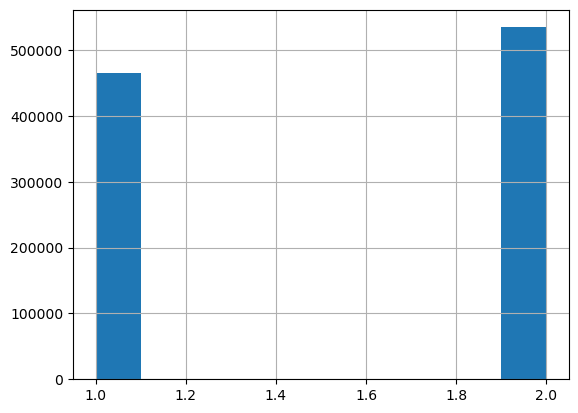

In [12]:
# vendor_id
train['vendor_id'].hist()
plt.show()

In [13]:
freq_passenger_count = train['vendor_id'].value_counts()
freq_passenger_count

2    534793
1    465207
Name: vendor_id, dtype: int64

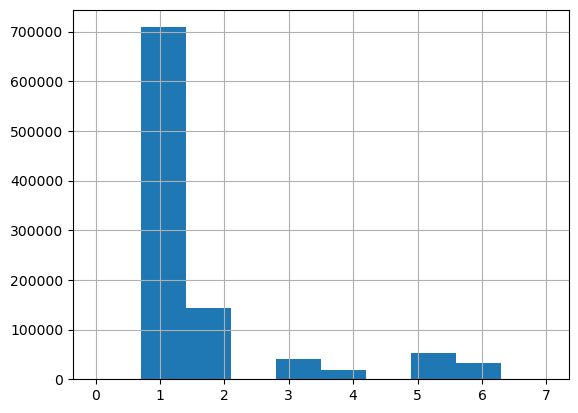

In [14]:
# passenger_count
train['passenger_count'].hist()
plt.show()

In [15]:
freq_passenger_count = train['passenger_count'].value_counts()
freq_passenger_count

1    708628
2    143907
5     53635
3     41012
6     33287
4     19491
0        38
7         2
Name: passenger_count, dtype: int64

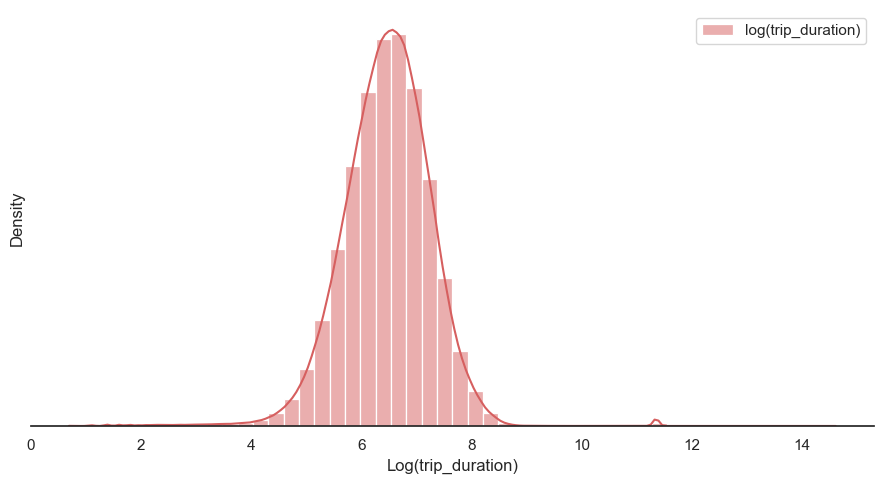

In [16]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 1, figsize=(9, 5), sharex=True)
sns.despine(left=True)

sns.histplot(train['log_trip_duration'], kde=True, bins=50, color="r", label='log(trip_duration)', ax=axes)
axes.set_xlabel('Log(trip_duration)')
axes.set_ylabel('Density')
axes.legend()

plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

- with the above histogram and kernel density plot that the trip-durations are like Gaussian and few trips have very large duration

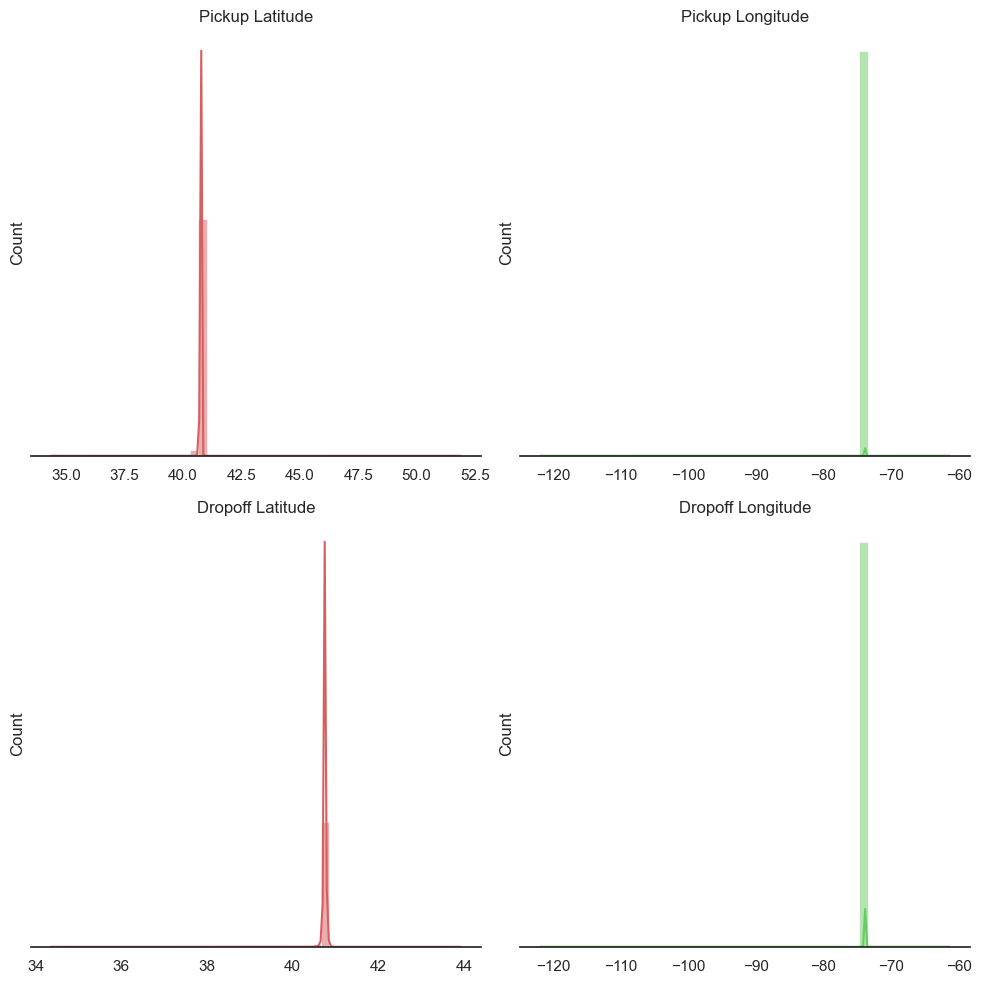

In [17]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=False, sharey=False)
sns.despine(left=True)
sns.histplot(train['pickup_latitude'].values, kde=True, color="r", bins=50, ax=axes[0, 0])
axes[0, 0].set_title('Pickup Latitude')
sns.histplot(train['pickup_longitude'].values, kde=True, color="g", bins=50, ax=axes[0, 1])
axes[0, 1].set_title('Pickup Longitude')
sns.histplot(train['dropoff_latitude'].values, kde=True, color="r", bins=50, ax=axes[1, 0])
axes[1, 0].set_title('Dropoff Latitude')
sns.histplot(train['dropoff_longitude'].values, kde=True, color="g", bins=50, ax=axes[1, 1])
axes[1, 1].set_title('Dropoff Longitude')
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

- Both pickup and dropoff latitudes are tightly clustered around the 40.5 to 41-degree range.
- Both pickup and dropoff longitudes are tightly clustered around the -74.1 to -73.7-degree range.
-  Let's remove those large duration trip

In [18]:
train = train.loc[(train.pickup_latitude > 40.6) & (train.pickup_latitude < 40.9)]
train = train.loc[(train.dropoff_latitude>40.6) & (train.dropoff_latitude < 40.9)]
train = train.loc[(train.pickup_longitude > -74.05) & (train.pickup_longitude < -73.7)]
train = train.loc[(train.dropoff_longitude > -74.05) & (train.dropoff_longitude < -73.7)]

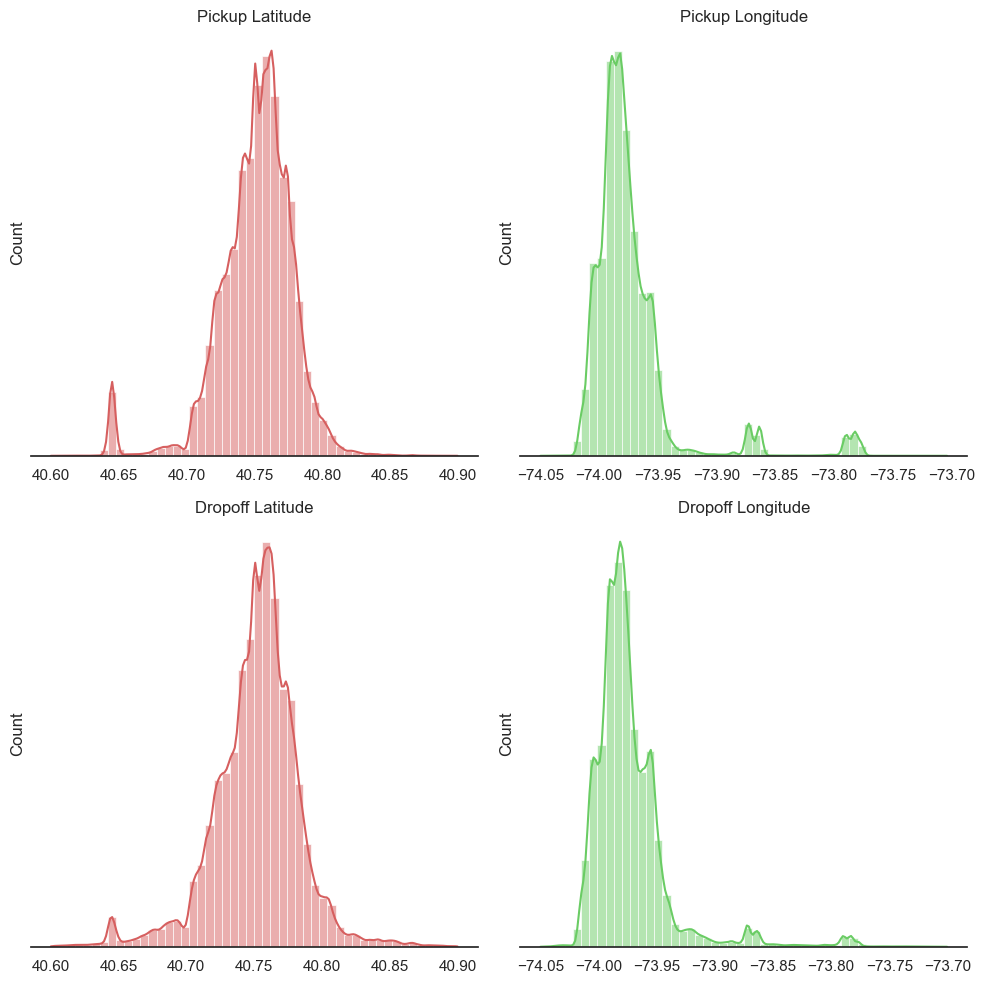

In [19]:
# Set the aesthetic style of the plots
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=False, sharey=False)
sns.despine(left=True)
sns.histplot(train['pickup_latitude'].values, kde=True, color="r", bins=50, ax=axes[0, 0])
axes[0, 0].set_title('Pickup Latitude')
sns.histplot(train['pickup_longitude'].values, kde=True, color="g", bins=50, ax=axes[0, 1])
axes[0, 1].set_title('Pickup Longitude')
sns.histplot(train['dropoff_latitude'].values, kde=True, color="r", bins=50, ax=axes[1, 0])
axes[1, 0].set_title('Dropoff Latitude')
sns.histplot(train['dropoff_longitude'].values, kde=True, color="g", bins=50, ax=axes[1, 1])
axes[1, 1].set_title('Dropoff Longitude')
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

### Feature Generation

Here we make a very simple data pre-processing and feature selection.

In [20]:
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in kilometers
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)
    delta_lat = lat2_rad - lat1_rad
    delta_lon = lon2_rad - lon1_rad
    a = np.sin(delta_lat / 2) ** 2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(delta_lon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

def manhattan_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in kilometers
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)
    
    delta_lat = np.abs(lat2_rad - lat1_rad)
    delta_lon = np.abs(lon2_rad - lon1_rad)
    
    a_lat = R * delta_lat
    a_lon = R * delta_lon * np.cos((lat1_rad + lat2_rad) / 2)
    
    distance = a_lat + a_lon
    return distance


def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

def Rush_Hour_Indicator(hour):
    if (hour >= 6 and hour <= 9) or (hour >= 16 and hour <= 18):
        return 1
    else:
        return 0

def Time_of_Day_Segment(hour):
    if hour >= 6 and hour < 12:
        return 0  # Morning
    elif hour >= 12 and hour < 18:
        return 1  # Afternoon
    elif hour >= 18 and hour < 22:
        return 2  # Evening
    else:
        return 3  # Night

def remove_outliers(train):
    train = train.loc[(train.pickup_latitude > 40.6) & (train.pickup_latitude < 40.9)]
    train = train.loc[(train.dropoff_latitude>40.6) & (train.dropoff_latitude < 40.9)]
    train = train.loc[(train.pickup_longitude > -74.05) & (train.pickup_longitude < -73.7)]
    train = train.loc[(train.dropoff_longitude > -74.05) & (train.dropoff_longitude < -73.7)]
    
    train = train.loc[train.haversine_distance<=30]
    return train


def cluster_features(train, test, n=10):
    coords = np.vstack((train[['pickup_latitude', 'pickup_longitude']].values,
                    train[['dropoff_latitude', 'dropoff_longitude']].values))
    
    sample_ind = np.random.permutation(len(coords))[:500000]
    kmeans = MiniBatchKMeans(n_clusters=n, batch_size=10000).fit(coords[sample_ind])
    
    train.loc[:, 'pickup_cluster'] = kmeans.predict(train[['pickup_latitude', 'pickup_longitude']])
    train.loc[:, 'dropoff_cluster'] = kmeans.predict(train[['dropoff_latitude', 'dropoff_longitude']])
    test.loc[:, 'pickup_cluster'] = kmeans.predict(test[['pickup_latitude', 'pickup_longitude']])
    test.loc[:, 'dropoff_cluster'] = kmeans.predict(test[['dropoff_latitude', 'dropoff_longitude']])
    
    return  train, test

### Prepare Data

In [21]:
def prepare_data(train):
    
    # convert 'pickup_datetime' to >> 'dayofweek', 'month', 'hour', 'dayofyear'
    train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
    train['dayofweek'] = train.pickup_datetime.dt.dayofweek
    train['month'] = train.pickup_datetime.dt.month
    train['hour'] = train.pickup_datetime.dt.hour
    train['dayofyear'] = train.pickup_datetime.dt.dayofyear

    # drop 'pickup_datetime'
    train.drop(columns=['pickup_datetime'], inplace=True)   
    
    # Note, it will map the available 2 classes to {0, 1}
    train = pd.get_dummies(train, columns=['store_and_fwd_flag'])
    
    # calculating haversine distance 
    train['haversine_distance'] = haversine_distance(train['pickup_latitude'], train['pickup_longitude'], train['dropoff_latitude'], train['dropoff_longitude'])
    
    # calculating manhattan distance 
    train['manhattan_distance'] = manhattan_distance(train['pickup_latitude'], train['pickup_longitude'], train['dropoff_latitude'], train['dropoff_longitude'])
    
    # Bearing: The direction of the trip.
    train['Bearing'] = bearing_array(train['pickup_latitude'], train['pickup_longitude'], train['dropoff_latitude'], train['dropoff_longitude'])
    
    # Apply Rush_Hour_Indicator function to create the 'rush_hour' column
    train['rush_hour'] = train['hour'].apply(Rush_Hour_Indicator)
    
    # Create a new column 'weekend' with binary indicator for weekend (1) or weekday (0)
    train['weekend'] = (train['dayofweek'] >= 5).astype(int)
    
    # Apply Time_of_Day_Segment function to create the 'day_part' column
    train['day_part'] = train['hour'].apply(Time_of_Day_Segment)
    
    """
    Remove rows where pickup or dropoff latitude is outside the range 40.6 to 40.9,
    or where pickup or dropoff longitude is outside the range -74.05 to -73.7.
    """
    train = remove_outliers(train)
    
    return train


In [22]:
train = prepare_data(train)

In [23]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,log_trip_duration,dayofweek,month,hour,dayofyear,store_and_fwd_flag_N,store_and_fwd_flag_Y,haversine_distance,manhattan_distance,Bearing,rush_hour,weekend,day_part
count,995655.000000,995655.000000,995655.000000,995655.000000,995655.000000,995655.000000,995655.000000,995655.000000,995655.000000,995655.000000,995655.000000,995655.000000,995655.000000,995655.000000,995655.000000,995655.000000,995655.000000,995655.000000,995655.000000
mean,1.534777,1.665407,-73.973538,40.751038,-73.973107,40.752002,6.462769,3.051391,3.514727,13.608624,91.767846,0.994461,0.005539,3.371557,4.359002,-15.640357,0.312165,0.285764,1.434764
std,0.498789,1.315991,0.037743,0.027875,0.033606,0.031391,0.789966,1.954507,1.681164,6.399551,51.566769,0.074219,0.074219,3.782317,5.043623,104.477360,0.463377,0.451778,1.085110
min,1.000000,0.000000,-74.049881,40.600216,-74.049988,40.600109,0.693147,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-179.992701,0.000000,0.000000,0.000000
25%,1.000000,1.000000,-73.991844,40.737431,-73.991280,40.736214,5.983936,1.000000,2.000000,9.000000,48.000000,1.000000,0.000000,1.230238,1.568696,-125.569656,0.000000,0.000000,1.000000
50%,2.000000,1.000000,-73.981728,40.754162,-73.979736,40.754639,6.493754,3.000000,4.000000,14.000000,92.000000,1.000000,0.000000,2.083877,2.676634,8.300851,0.000000,0.000000,1.000000
75%,2.000000,2.000000,-73.967377,40.768398,-73.963058,40.769852,6.974479,5.000000,5.000000,19.000000,136.000000,1.000000,0.000000,3.836005,4.951107,53.399912,1.000000,1.000000,2.000000
max,2.000000,7.000000,-73.703575,40.899410,-73.700302,40.899956,14.616441,6.000000,6.000000,23.000000,182.000000,1.000000,1.000000,29.944772,40.446029,180.000000,1.000000,1.000000,3.000000


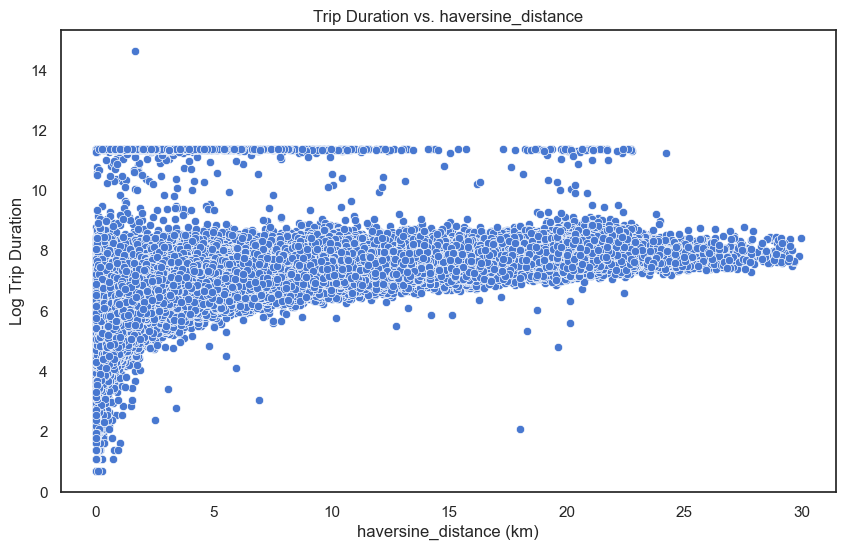

In [24]:
# Scatter plot of trip duration vs. distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train['haversine_distance'], y=train['log_trip_duration'])
plt.title('Trip Duration vs. haversine_distance')
plt.xlabel('haversine_distance (km)')
plt.ylabel('Log Trip Duration')
plt.show()

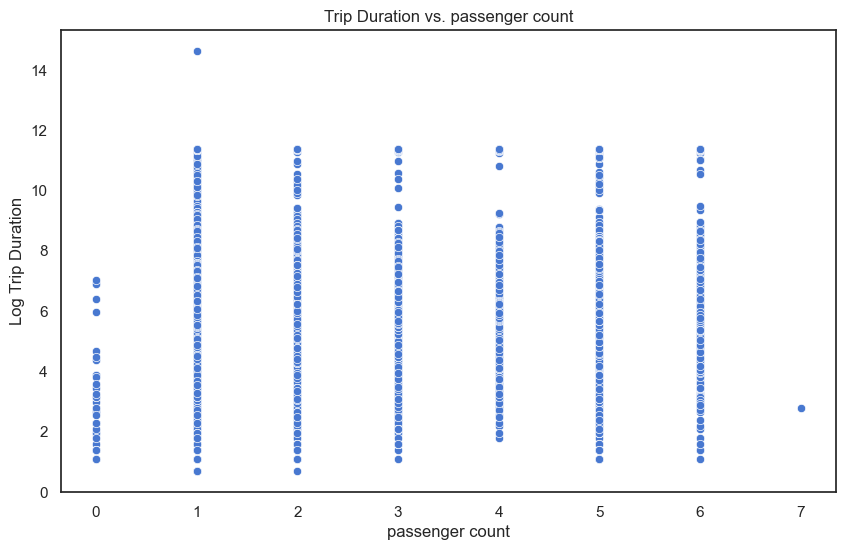

In [25]:
# Scatter plot of trip duration vs. distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train['passenger_count'], y=train['log_trip_duration'])
plt.title('Trip Duration vs. passenger count')
plt.xlabel('passenger count')
plt.ylabel('Log Trip Duration')
plt.show()

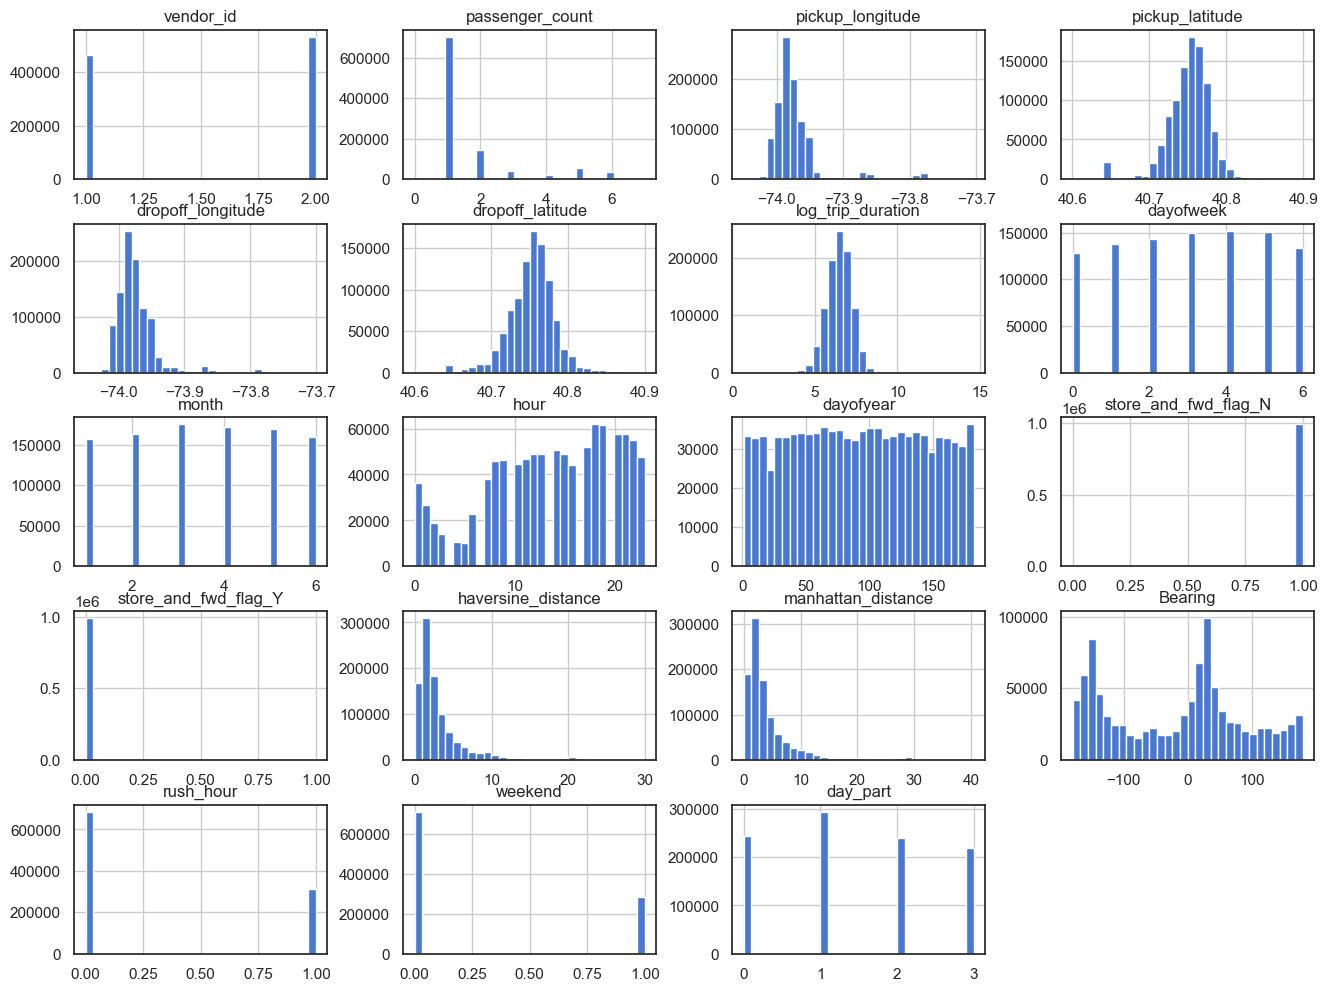

In [26]:
##  plot a histogram for each numerical attribute 
train.hist(bins=30, figsize=(16, 12))
plt.show()

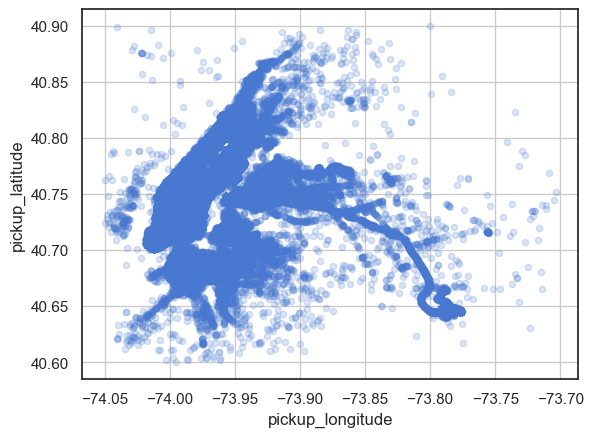

In [27]:
train.plot(kind="scatter", x="pickup_longitude", y="pickup_latitude",
grid=True, alpha=0.2)
plt.show()

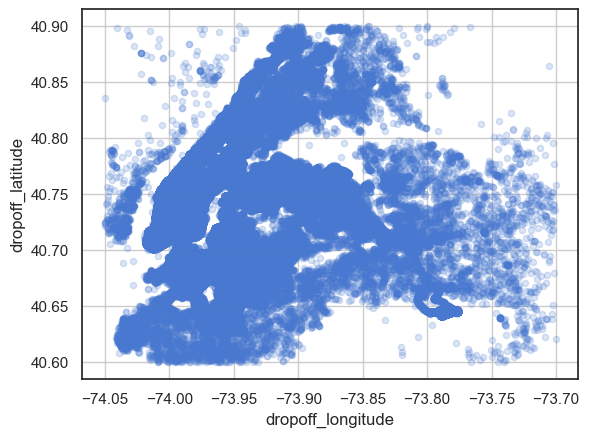

In [28]:
train.plot(kind="scatter", x="dropoff_longitude", y="dropoff_latitude",
grid=True, alpha=0.2)
plt.show()

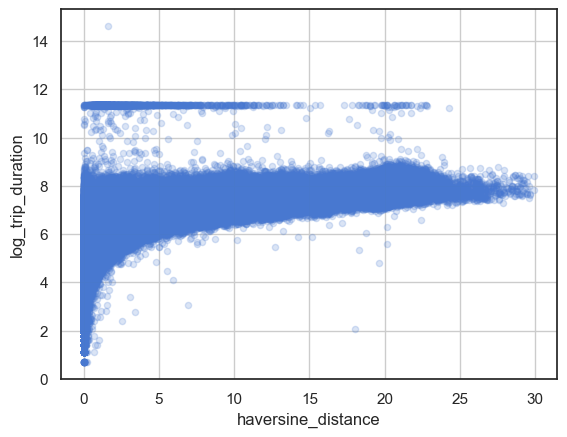

In [29]:
train.plot(kind="scatter", x="haversine_distance", y="log_trip_duration",
grid=True, alpha=0.2)
plt.show()

In [30]:
# Look for Correlations
corr_matrix = train.corr()
corr_matrix["log_trip_duration"].sort_values(ascending=False)

C:\Users\user\AppData\Local\Temp\ipykernel_13360\490249058.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


log_trip_duration       1.000000
haversine_distance      0.627770
manhattan_distance      0.611526
pickup_longitude        0.204647
dropoff_longitude       0.164320
dayofyear               0.047360
month                   0.046223
hour                    0.039214
passenger_count         0.021424
vendor_id               0.018946
store_and_fwd_flag_Y    0.015746
Bearing                 0.005600
rush_hour              -0.003212
store_and_fwd_flag_N   -0.015746
day_part               -0.025728
dayofweek              -0.028217
weekend                -0.054513
dropoff_latitude       -0.136347
pickup_latitude        -0.168215
Name: log_trip_duration, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_13360\2924326153.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=heatmap_df.corr(),annot=True,cmap="coolwarm")


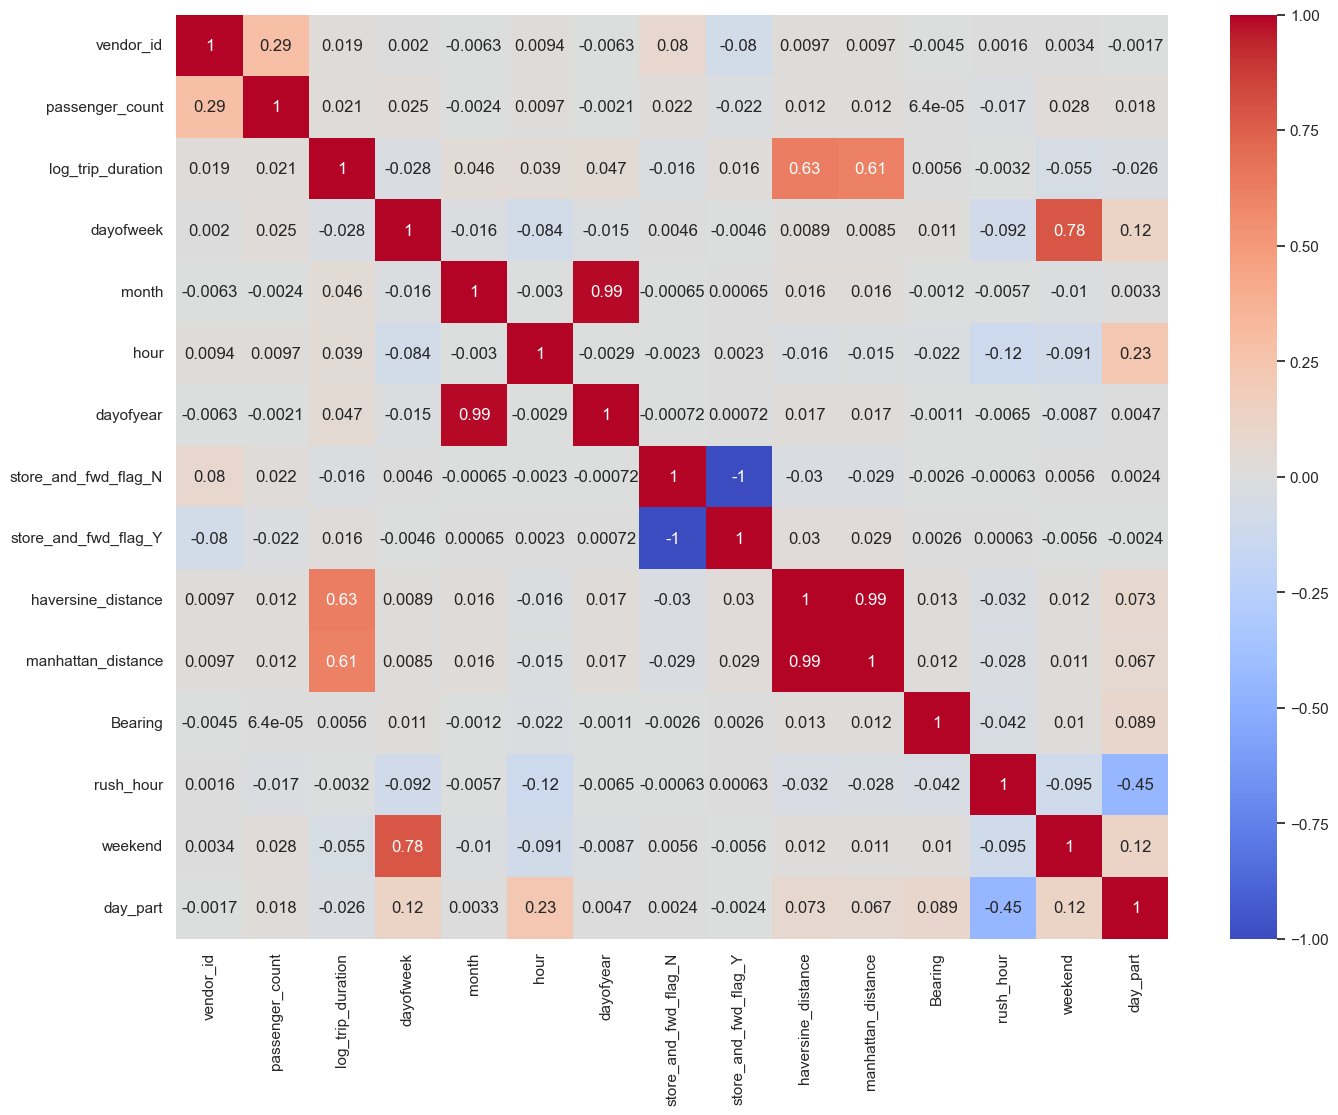

In [31]:
heatmap_df=train.drop(["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"],axis=1)

plt.figure(figsize=(16,12))
sns.heatmap(data=heatmap_df.corr(),annot=True,cmap="coolwarm")
plt.show()